In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
# load the data
df = pd.read_csv('data/MALDI_IHC/results/correlations_matrisome_full_vst_pearson.csv')

# Remove the unwanted columns (yet they might be useful for other analysis)
df = df.drop(columns=["Gene.Name", "Synonyms", "HGNC_IDs", "HGNC_IDs.Links", "UniProt_IDs", "Refseq_IDs", "Notes"])

# Replace the . with _ in the column names
df.columns = df.columns.str.replace(".", "_")

df.head()

,Gene_Id,Matrisome_Division,Matrisome_Category,Gene_Symbol,CD8,Collagen,Stroma,Tumor
0,ENSG00000154175,Core matrisome,ECM Glycoproteins,ABI3BP,0.084166,-0.279286,-0.141891,0.461361
1,ENSG00000181092,Core matrisome,ECM Glycoproteins,ADIPOQ,0.151377,-0.163420,0.043189,-0.161008
2,ENSG00000106624,Core matrisome,ECM Glycoproteins,AEBP1,-0.138238,-0.502142,0.397378,-0.116389
3,ENSG00000188157,Core matrisome,ECM Glycoproteins,AGRN,0.145888,-0.694247,0.067387,0.135760
4,ENSG00000178522,Core matrisome,ECM Glycoproteins,AMBN,-0.201039,-0.313713,0.128598,-0.277614


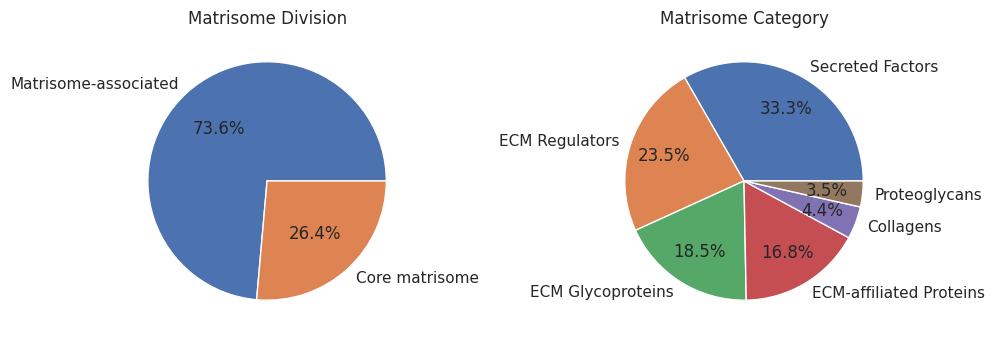

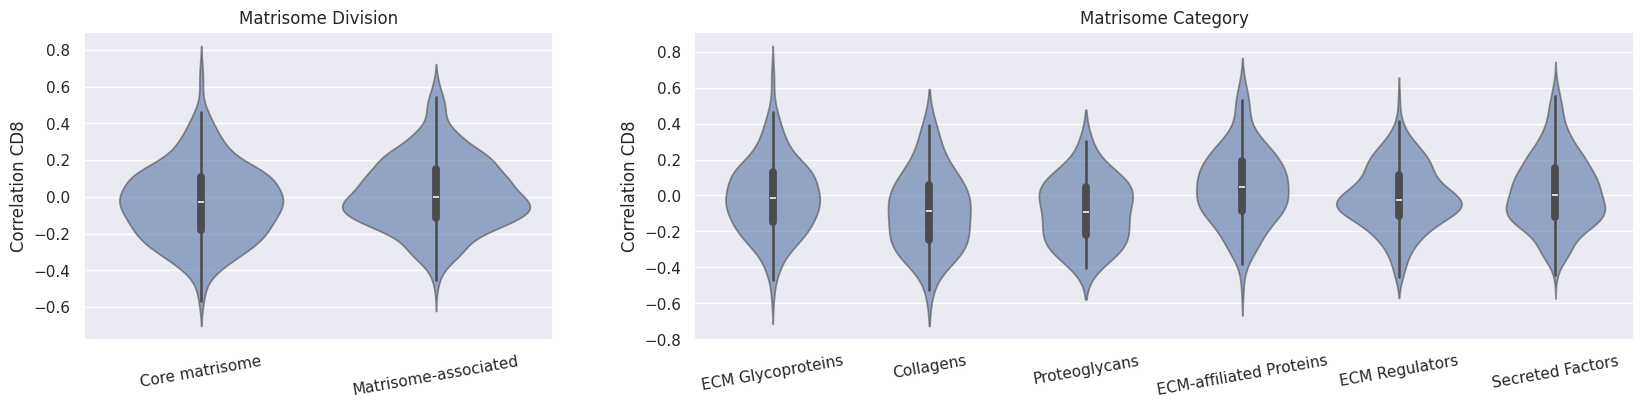

In [3]:
# plot pie chart of Matrisome_Division and Matrisome_Category
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

df.Matrisome_Division.value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set_title("Matrisome Division")
ax[0].set_ylabel('')

df.Matrisome_Category.value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', pctdistance=0.7)
ax[1].set_title("Matrisome Category")
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0.6)  # Increase the horizontal space between the plots

plt.show()

# Draw a violin plot of the correlation values for each Matrisome Division and Matrisome Category
fig, ax = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [1, 2]})

sns.violinplot(x="Matrisome_Division", y="CD8", data=df, ax=ax[0], alpha=0.6)
ax[0].set_title("Matrisome Division")
ax[0].set_xlabel("")
ax[0].set_ylabel("Correlation CD8")
ax[0].tick_params(axis='x', rotation=10)

sns.violinplot(x="Matrisome_Category", y="CD8", data=df, ax=ax[1], alpha=0.6)
ax[1].set_title("Matrisome Category")
ax[1].set_xlabel("")
ax[1].set_ylabel("Correlation CD8")
ax[1].tick_params(axis='x', rotation=10)

plt.show()

In [4]:
# Find the top genes with the highest correlation with CD8
top_genes = df.nlargest(20, 'CD8')
top_genes

,Gene_Id,Matrisome_Division,Matrisome_Category,Gene_Symbol,CD8,Collagen,Stroma,Tumor
9,ENSG00000188334,Core matrisome,ECM Glycoproteins,BSPH1,0.686027,-0.178778,-0.518199,0.257832
934,ENSG00000197364,Matrisome-associated,Secreted Factors,S100A7L2,0.615560,-0.011155,-0.298529,0.163014
378,ENSG00000215182,Matrisome-associated,ECM-affiliated Proteins,MUC5AC,0.614024,-0.162360,-0.556923,0.446569
306,ENSG00000165682,Matrisome-associated,ECM-affiliated Proteins,CLEC1B,0.613112,-0.217729,-0.186105,-0.062829
133,ENSG00000146374,Core matrisome,ECM Glycoproteins,RSPO3,0.603416,-0.212621,-0.209967,0.080745
711,ENSG00000137077,Matrisome-associated,Secreted Factors,CCL21,0.599060,-0.300898,-0.172656,0.017954
727,ENSG00000101938,Matrisome-associated,Secreted Factors,CHRDL1,0.553420,-0.198971,-0.272167,-0.024443
948,ENSG00000164690,Matrisome-associated,Secreted Factors,SHH,0.544350,-0.132763,-0.198055,-0.216827
902,ENSG00000169752,Matrisome-associated,Secreted Factors,NRG4,0.541406,-0.345995,-0.357410,0.094814
611,ENSG00000010438,Matrisome-associated,ECM Regulators,PRSS3,0.539139,-0.436373,-0.292663,0.199902


In [5]:
# Find the top genes with the lowest correlation with CD8
bottom_genes = df.nsmallest(20, 'CD8')
bottom_genes

,Gene_Id,Matrisome_Division,Matrisome_Category,Gene_Symbol,CD8,Collagen,Stroma,Tumor
51,ENSG00000115414,Core matrisome,ECM Glycoproteins,FN1,-0.567949,0.418263,0.432602,-0.397606
197,ENSG00000164692,Core matrisome,Collagens,COL1A2,-0.528848,0.114194,0.580134,-0.545224
274,ENSG00000265190,Matrisome-associated,ECM-affiliated Proteins,ANXA8,-0.516520,-0.154346,0.292208,0.139313
26,ENSG00000143369,Core matrisome,ECM Glycoproteins,ECM1,-0.468974,0.021701,0.346396,-0.108174
492,ENSG00000170373,Matrisome-associated,ECM Regulators,CST1,-0.451729,-0.043434,0.329911,-0.095130
444,ENSG00000008277,Matrisome-associated,ECM Regulators,ADAM22,-0.446703,-0.177297,0.240250,-0.073111
153,ENSG00000137801,Core matrisome,ECM Glycoproteins,THBS1,-0.444662,0.409286,0.311783,-0.446586
944,ENSG00000104332,Matrisome-associated,Secreted Factors,SFRP1,-0.444630,0.044630,0.110785,0.229584
639,ENSG00000106366,Matrisome-associated,ECM Regulators,SERPINE1,-0.441611,-0.276057,0.479923,-0.069978
230,ENSG00000106819,Core matrisome,Proteoglycans,ASPN,-0.406228,-0.354538,0.386372,-0.134781
